In [1]:
from glob import glob
import pandas as pd
import os
import re
import scipy.special
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# data_folder = "../data/paper/quantative_cardinality/5"
def load_directory(data_folder):
    sampling_folders = glob(data_folder+"/*")
    # print(sampling_folders[:5])
    # print(f"We have {len(sampling_folders)} samples")

    sampling_num_interiors = []
    sampling_num_CH = []
    sampling_num_puzzles = []
    sampling_total_num_points = []
    sampling_ids = []

    for folder in  sampling_folders:
        csv_paths = glob(os.path.join(folder,"*.csv"))
        count_puzzles = 0
        folder_puzzles_paths = []
        is_metdata_found = False

        num_interior = None
        num_CH = None

        for csv_path in csv_paths:
            csv_name = os.path.basename(csv_path)

            # Because the first kernel has always tiling, the metadata always starts with a letter 
            # There should be only one, if there many, take the latest (the variables num_interior and num_CH are overrided)
            if re.match("^[a-zA-Z]+.*",csv_name) and not csv_name.startswith("s_"):
                is_metdata_found = True
                df_metadata = pd.read_csv(csv_path)
                counts_roles = df_metadata["role"].value_counts()
                try:
                    num_interior = counts_roles["interior"]
                    # sampling_num_interiors.append()
                except KeyError:
                    num_interior = 0
                    # sampling_num_interiors.append(0)
                
                num_CH = counts_roles["frame"]
                # sampling_num_CH.append(counts_roles["frame"])
            else:
                count_puzzles+=1
        

        if not is_metdata_found:
            raise Exception(f"Cannot find the sampling metadata csv of {folder}")
        
        sampling_num_interiors.append(num_interior)
        sampling_num_CH.append(num_CH)

        sampling_num_puzzles.append(count_puzzles)
        containing_dir = os.path.basename(folder)
        sampling_ids.append(containing_dir)



    df_all_samples = pd.DataFrame({
        "id": sampling_ids,
        "num_interior":sampling_num_interiors,
        "num_CH": sampling_num_CH,
        "num_puzzles":sampling_num_puzzles
    })

    df_all_samples["num_total_points"] = df_all_samples["num_interior"] + df_all_samples["num_CH"]

    # A sampling must create a puzzle, remove all the sampling that were failed
    df_all_samples.drop(df_all_samples[df_all_samples["num_puzzles"] == 0].index, inplace=True)
    # df_all_samples.head(50)

    return df_all_samples

In [3]:
means = []
stds = []

num_points_arange = range(5,11)

for num_points in num_points_arange:
    df = load_directory(f"../data/paper/quantative_cardinality/{num_points}")
    means.append(df["num_puzzles"].mean())
    stds.append(df["num_puzzles"].std())

print(f"means: {means}")
print(f"stds: {stds}")

means: [5.8, 25.6, 78.8, 601.6, 3053.6, 16963.6]
stds: [2.8596814119369625, 7.48628375393589, 33.08507552087833, 209.99481475079858, 1088.9473204276994, 6368.962940175845]


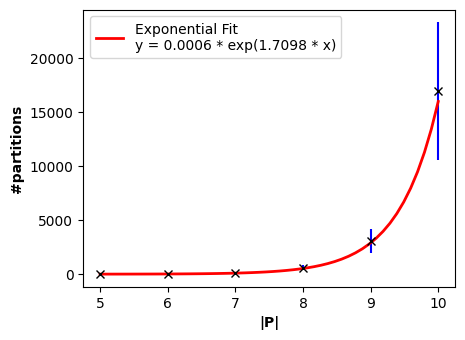

In [4]:

plt.figure(figsize=(4.8,3.6))
ax = plt.subplot()
ax.errorbar(num_points_arange,means,yerr=stds,marker="x",color="None",markeredgecolor="black",ecolor="blue")


# Exponential fit function
a = 0.0006
b = 1.7098

# Evaluate the fitted exponential function at the x values
start_sampling = 5
end_sampling = 10
sampling_points = np.linspace(start_sampling,end_sampling)

fitted_values = a * np.exp(b * sampling_points)

# Plot the exponential fit
ax.plot(sampling_points, fitted_values, 'r-', label=f'Exponential Fit\ny = {a:.4f} * exp({b:.4f} * x)', linewidth=2)


ax.set_xticks(num_points_arange)
ax.set_xlabel("|P|",fontweight="bold")
ax.set_ylabel("#partitions",fontweight="bold")

ax.legend(loc="upper left")

plt.show()

In [ ]:
'''
MATLAB CODE

% Given x (n) and y values
n = [5, 6, 7, 8, 9, 10];
y = [5.8, 25.6, 78.8, 601.6, 3053.6, 16963.6];

% Define the model function y = c^n
model = @(c, n) c.^n;

% Define the error function to minimize (difference between model and data)
error_function = @(c) sum((model(c, n) - y).^2);

% Use fminsearch to find the best value of c
c_initial = 2; % Initial guess for c
c_opt = fminsearch(error_function, c_initial);

% Evaluate the fitted function
y_fit = c_opt.^n;

% Plot the original data and the fitted function
figure;
plot(n, y, 'bo', 'MarkerSize', 10, 'DisplayName', 'Original Data'); % Original data points
hold on;
plot(n, y_fit, 'r-', 'LineWidth', 2, 'DisplayName', sprintf('Fitted Model: y = %.4f^n', c_opt)); % Fitted curve
xlabel('n', 'FontWeight', 'bold');
ylabel('y', 'FontWeight', 'bold');
title('Exponential Fit (y = c^n)', 'FontWeight', 'bold');
legend show;
grid on;
hold off;

% Display the result
disp('Fitted Exponential Function:');
fprintf('y = %.4f^n\n', c_opt);


'''

# mapping c^n panel A at fig nisuy

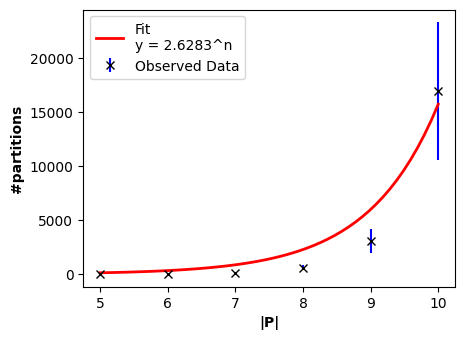

In [8]:

plt.figure(figsize=(4.8,3.6))
ax = plt.subplot()

y = np.array([5.8, 25.6, 78.8, 601.6, 3053.6, 16963.6])
stds = np.array([2.8596814119369625, 7.48628375393589, 33.08507552087833, 209.99481475079858, 1088.9473204276994, 6368.962940175845])
start_sampling = 5

num_of_P = np.arange(len(y)) + start_sampling
ax.errorbar(num_points_arange,means,yerr=stds,marker="x",color="None",markeredgecolor="black",ecolor="blue", label="Observed Data")


# Exponential fit function

# Evaluate the fitted exponential function at the x values
start_sampling = 5
# end_sampling = 10

sampling_points = np.linspace(start_sampling,start_sampling+len(y)-1)
c =  2.6283
fitted_values = np.power(c,sampling_points)


# Plot the exponential fit
ax.plot(sampling_points, fitted_values, 'r-', label=f'Fit\ny = {c}^n', linewidth=2)


ax.set_xticks(num_points_arange)
ax.set_xlabel("|P|",fontweight="bold")
ax.set_ylabel("#partitions",fontweight="bold")

ax.legend(loc="upper left")

plt.show()

In [ ]:
'''
MATLAB CODE

% Given x (n), y values, and standard deviations (STDs)
n = [5, 6, 7, 8, 9, 10];
y = [5.8, 25.6, 78.8, 601.6, 3053.6, 16963.6];
stds = [2.8596814119369625, 7.48628375393589, 33.08507552087833, 209.99481475079858, 1088.9473204276994, 6368.962940175845]; % Replace with actual standard deviations

% Define the model function y = c^n
model = @(c, n) c.^n;

% Define the weighted error function to minimize
% Weight is inverse of variance (std^2)
error_function = @(c) sum(((model(c, n) - y) ./ stds).^2);

% Use fminsearch to find the best value of c
c_initial = 2; % Initial guess for c
c_opt = fminsearch(error_function, c_initial);

% Evaluate the fitted function
y_fit = c_opt.^n;

% Plot the original data and the fitted function
figure;
errorbar(n, y, stds, 'bo', 'MarkerSize', 10, 'DisplayName', 'Original Data (with error bars)'); % Original data with error bars
hold on;
plot(n, y_fit, 'r-', 'LineWidth', 2, 'DisplayName', sprintf('Fitted Model: y = %.4f^n', c_opt)); % Fitted curve
xlabel('n', 'FontWeight', 'bold');
ylabel('y', 'FontWeight', 'bold');
title('Exponential Fit (y = c^n) with Weights', 'FontWeight', 'bold');
legend show;
grid on;
hold off;

% Display the result
disp('Fitted Exponential Function:');
fprintf('y = %.4f^n\n', c_opt);
'''

5.8


# Mapping a*c^n nisuy panel A

In [ ]:
'''


% Given x (n) and y values
n = [5, 6, 7, 8, 9, 10];
y = [5.8, 25.6, 78.8, 601.6, 3053.6, 16963.6];

% Define the model function y = a * c^n
model = @(params, n) params(1) * (params(2).^n); % params(1) = a, params(2) = c

% Define the error function to minimize (difference between model and data)
error_function = @(params) sum((model(params, n) - y).^2);

% Initial guesses for a and c
params_initial = [1, 2]; % Initial guesses: a = 1, c = 2

% Use fminsearch to find the best values for a and c
params_opt = fminsearch(error_function, params_initial);

% Extract the optimized values of a and c
a_opt = params_opt(1);
c_opt = params_opt(2);

% Evaluate the fitted function
y_fit = model([a_opt, c_opt], n);

% Plot the original data and the fitted function
figure;
plot(n, y, 'bo', 'MarkerSize', 10, 'DisplayName', 'Original Data'); % Original data points
hold on;
plot(n, y_fit, 'r-', 'LineWidth', 2, 'DisplayName', sprintf('Fitted Model: y = %.4f * %.4f^n', a_opt, c_opt)); % Fitted curve
xlabel('n', 'FontWeight', 'bold');
ylabel('y', 'FontWeight', 'bold');
title('Exponential Fit (y = a * c^n)', 'FontWeight', 'bold');
legend show;
grid on;
hold off;

% Display the result
disp('Fitted Exponential Function:');
fprintf('y = %.4f * %.4f^n\n', a_opt, c_opt);

'''

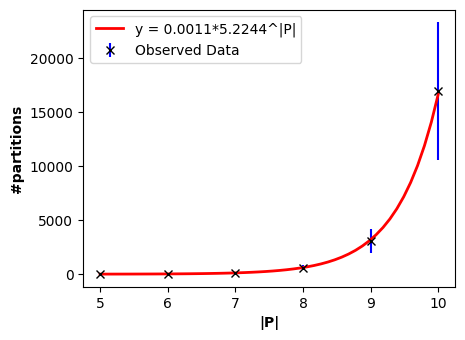

In [5]:
#0.0011 * 5.2244^n


plt.figure(figsize=(4.8,3.6))
ax = plt.subplot()

y = np.array([5.8, 25.6, 78.8, 601.6, 3053.6, 16963.6])
stds = np.array([2.8596814119369625, 7.48628375393589, 33.08507552087833, 209.99481475079858, 1088.9473204276994, 6368.962940175845])
start_sampling = 5

num_of_P = np.arange(len(y)) + start_sampling
ax.errorbar(num_points_arange,means,yerr=stds,marker="x",color="None",markeredgecolor="black",ecolor="blue", label="Observed Data")


# Exponential fit function

# Evaluate the fitted exponential function at the x values
start_sampling = 5
# end_sampling = 10

sampling_points = np.linspace(start_sampling,start_sampling+len(y)-1)
c =  5.2244
a = 0.0011
fitted_values = a*np.power(c,sampling_points)


# Plot the exponential fit
ax.plot(sampling_points, fitted_values, 'r-', label=f'y = {a}*{c}^|P|', linewidth=2)


ax.set_xticks(num_points_arange)
ax.set_xlabel("|P|",fontweight="bold")
ax.set_ylabel("#partitions",fontweight="bold")

ax.legend(loc="upper left")

plt.show()

# Panel of I(P) increasing

In [13]:

df = load_directory(f"../data/paper/quantative_I_P_increase/10_second")
print(len(df))
df.head(50)

8


,id,num_interior,num_CH,num_puzzles,num_total_points
0,2024-12-01 16-36-52+862561,1,9,20683,10
1,2024-12-01 17-32-55+408278,1,9,16459,10
2,2024-12-01 18-44-25+778978,1,9,22051,10
3,2024-12-01 19-34-23+874271,1,9,20683,10
4,2024-12-01 20-26-43+721211,1,9,19599,10
5,2024-12-01 21-07-08+580969,2,8,19489,10
6,2024-12-01 21-37-25+291987,2,8,21521,10
7,2024-12-01 22-03-11+847616,2,8,25309,10


In [14]:
groupby = df.groupby(["num_CH","num_interior"],as_index=False).agg({"num_puzzles":["mean","std","max","count"]})
groupby.head(50)

num_CH num_interior   num_puzzles                          
                               mean          std    max count
0      8            2  22106.333333  2953.821480  25309     3
1      9            1  19895.000000  2108.550213  22051     5

In [5]:
groupby.values[:,2]

array([ 53.        ,  79.57142857,  93.        , 131.        ])

In [ ]:
#0.0011 * 5.2244^n
# panel_c_mean = 

plt.figure(figsize=(4.8,3.6))
ax = plt.subplot()

y = np.array([5.8, 25.6, 78.8, 601.6, 3053.6, 16963.6])
stds = np.array([2.8596814119369625, 7.48628375393589, 33.08507552087833, 209.99481475079858, 1088.9473204276994, 6368.962940175845])
start_sampling = 5

num_of_P = np.arange(len(y)) + start_sampling
ax.errorbar(num_points_arange,means,yerr=stds,marker="x",color="None",markeredgecolor="black",ecolor="blue", label="Observed Data")


# Exponential fit function

# Evaluate the fitted exponential function at the x values
start_sampling = 5
# end_sampling = 10

sampling_points = np.linspace(start_sampling,start_sampling+len(y)-1)
c =  5.2244
a = 0.0011
fitted_values = a*np.power(c,sampling_points)


# Plot the exponential fit
ax.plot(sampling_points, fitted_values, 'r-', label=f'y = {a}*{c}^|P|', linewidth=2)


ax.set_xticks(num_points_arange)
ax.set_xlabel("|P|",fontweight="bold")
ax.set_ylabel("#partitions",fontweight="bold")

ax.legend(loc="upper left")

plt.show()